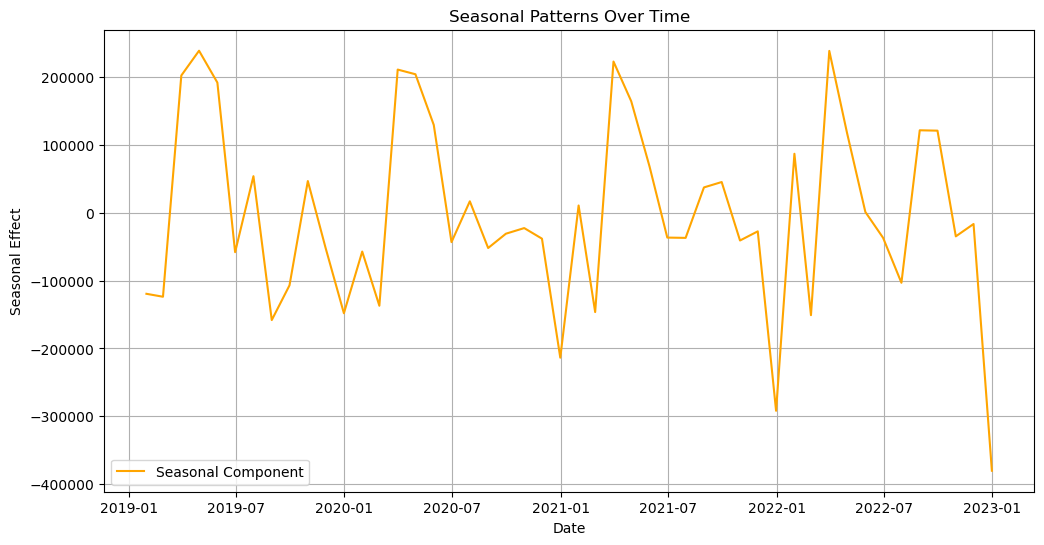

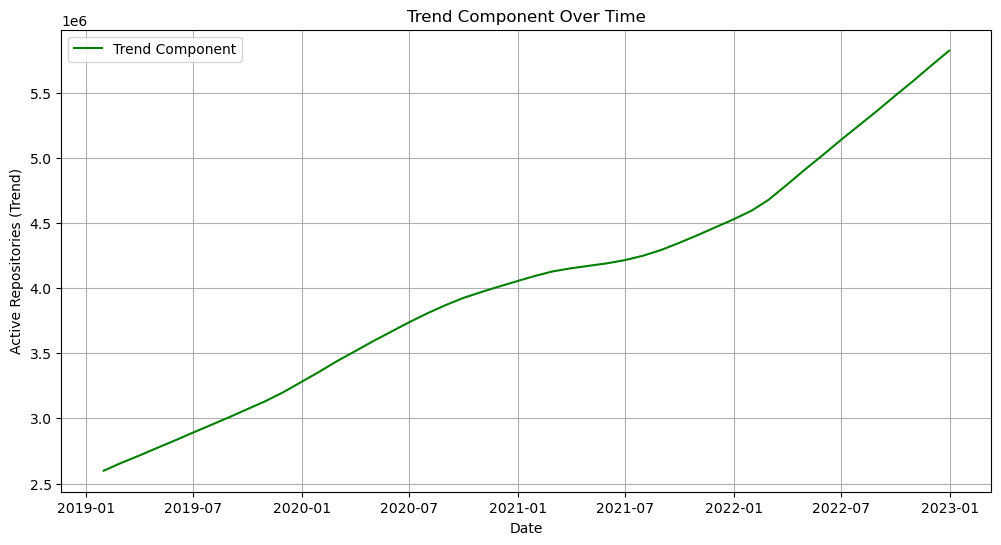

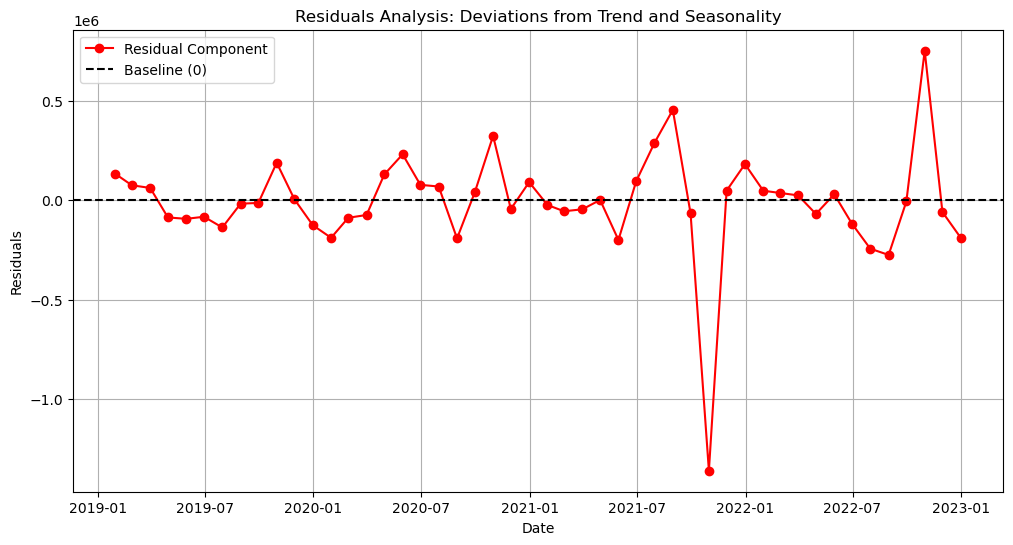

Significant Anomalies:
            Active_repos
Date                    
2021-10-31       3004922
2022-10-31       6304810


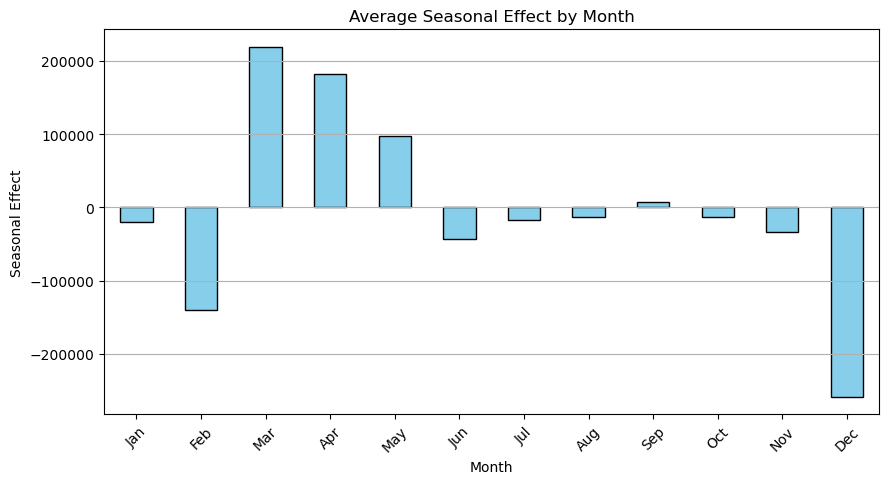

Descriptive Statistics for STL Components:
Trend Mean: 4032169.744031118, Std Dev: 871760.7780300941
Seasonal Mean: -2613.8491016237617, Std Dev: 138327.15907075306
Residual Mean: -9361.415762828148, Std Dev: 268647.7556330161


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Data for active repositories
active_repos = [
    # 2019
    2611644, 2606446, 2977006, 2923531, 2928444, 2747810, 2865740, 2832869, 2948599, 3366565, 3151836, 3005339,
    # 2020
    3112743, 3212295, 3652348, 3924648, 4024904, 3770460, 3891180, 3624909, 3932372, 4270893, 3929484, 3931157,
    # 2021
    4081612, 3925755, 4329131, 4336548, 4058366, 4272619, 4499374, 4784067, 4325393, 3004922, 4486062, 4416160,
    # 2022
    4729303, 4561140, 5053435, 4954260, 5050879, 4977946, 4899357, 5206425, 5588289, 6304810, 5628455, 5251805
]

# Create a DataFrame with a date index
dates = pd.date_range(start="2019-01-01", end="2022-12-31", freq="M")
df = pd.DataFrame({"Date": dates, "Active_repos": active_repos})
df.set_index("Date", inplace=True)

# Perform STL decomposition
stl = STL(df['Active_repos'], seasonal=13)  # Adjusted seasonal parameter
result = stl.fit()

# 1. Plot the Seasonal Component
plt.figure(figsize=(12, 6))
plt.plot(result.seasonal, label='Seasonal Component', color='orange', linestyle='-')
plt.title("Seasonal Patterns Over Time")
plt.xlabel("Date")
plt.ylabel("Seasonal Effect")
plt.grid(True)
plt.legend()
plt.show()

# 2. Plot the Trend Component
plt.figure(figsize=(12, 6))
plt.plot(result.trend, label='Trend Component', color='green', linestyle='-')
plt.title("Trend Component Over Time")
plt.xlabel("Date")
plt.ylabel("Active Repositories (Trend)")
plt.grid(True)
plt.legend()
plt.show()

# 3. Analyze Residuals for Anomalies
plt.figure(figsize=(12, 6))
plt.plot(result.resid, label='Residual Component', color='red', marker='o', linestyle='-')
plt.axhline(y=0, color='black', linestyle='--', label='Baseline (0)')
plt.title("Residuals Analysis: Deviations from Trend and Seasonality")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.legend()
plt.show()

# Identify Significant Anomalies
threshold = 2 * result.resid.std()  # Define a threshold for significant anomalies
anomalies = df[result.resid.abs() > threshold]
print("Significant Anomalies:")
print(anomalies)

# 4. Average Seasonal Effect by Month
seasonal_mean = result.seasonal.groupby(result.seasonal.index.month).mean()

# Bar plot for average seasonal effect
plt.figure(figsize=(10, 5))
seasonal_mean.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Seasonal Effect by Month")
plt.xlabel("Month")
plt.ylabel("Seasonal Effect")
plt.xticks(range(12), [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Descriptive Statistics for Components
print("Descriptive Statistics for STL Components:")
print(f"Trend Mean: {result.trend.mean()}, Std Dev: {result.trend.std()}")
print(f"Seasonal Mean: {result.seasonal.mean()}, Std Dev: {result.seasonal.std()}")
print(f"Residual Mean: {result.resid.mean()}, Std Dev: {result.resid.std()}")
